In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

Archive:  /content/drive/MyDrive/Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423

#Image Augmentation


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale= 1./255,horizontal_flip =True,vertical_flip = True,zoom_range = 0.2)

test_data = ImageDataGenerator(rescale= 1./255)

In [12]:
Flower_train = train_data.flow_from_directory('/content/flowers',
                                            target_size = (64,64),
                                            class_mode ="categorical",
                                            batch_size = 28)

Found 4317 images belonging to 5 classes.


In [13]:
Flower_test = test_data.flow_from_directory('/content/flowers',
                                          target_size = (64,64),
                                          class_mode = "categorical",
                                          batch_size = 28)

Found 4317 images belonging to 5 classes.


#Create model

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [8]:
model=Sequential()

# Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)
#Compile The Model
#Fit The Model

In [14]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#fully connected layer
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
# output layer
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics
=['accuracy'])
model.fit(Flower_train,steps_per_epoch=len(Flower_train),validation_data=Flower_test,
validation_steps=len(Flower_test),epochs=10)

Epoch 1/10
155/155 [==============================] - 25s 154ms/step - loss: 1.2453 - accuracy: 0.4811 - val_loss: 1.2398 - val_accuracy: 0.5082
Epoch 2/10
155/155 [==============================] - 24s 153ms/step - loss: 1.0592 - accuracy: 0.5798 - val_loss: 1.0446 - val_accuracy: 0.5902
Epoch 3/10
155/155 [==============================] - 24s 153ms/step - loss: 0.9825 - accuracy: 0.6183 - val_loss: 0.9623 - val_accuracy: 0.6359
Epoch 4/10
155/155 [==============================] - 26s 169ms/step - loss: 0.9272 - accuracy: 0.6342 - val_loss: 0.9435 - val_accuracy: 0.6386
Epoch 5/10
155/155 [==============================] - 25s 162ms/step - loss: 0.8979 - accuracy: 0.6440 - val_loss: 0.8634 - val_accuracy: 0.6634
Epoch 6/10
155/155 [==============================] - 24s 154ms/step - loss: 0.8593 - accuracy: 0.6692 - val_loss: 0.8127 - val_accuracy: 0.6889
Epoch 7/10
155/155 [==============================] - 24s 155ms/step - loss: 0.8119 - accuracy: 0.6857 - val_loss: 0.8451 - val_ac

In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_9 (Dense)             (None, 300)               9225900   
                                                                 
 dense_10 (Dense)            (None, 150)               45150     
                                                                 
 dense_11 (Dense)            (None, 5)                 755       
                                                      

#save the model

In [16]:
model.save('Flower.h9')

#Test the model

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [18]:
tulip = image.load_img('/content/flowers/tulip/10163955604_ae0b830975_n.jpg',target_size=(200,200))

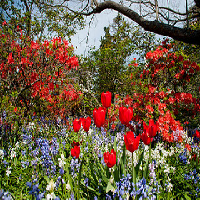

In [19]:
tulip

In [20]:
array = image.img_to_array(tulip)
array

array([[[ 82., 108., 133.],
        [ 27.,  27.,   0.],
        [  0.,   5.,   0.],
        ...,
        [  1.,   9.,   0.],
        [  6.,   7.,   0.],
        [  7.,   0.,   5.]],

       [[ 67.,  92.,  60.],
        [ 22.,  24.,  19.],
        [ 53.,  40.,  31.],
        ...,
        [ 11.,   0.,   8.],
        [  3.,   0.,   4.],
        [  0.,   5.,   0.]],

       [[ 31.,  29.,  17.],
        [ 47.,  62.,   0.],
        [ 41.,  57.,  18.],
        ...,
        [ 10.,  10.,  12.],
        [  3.,   3.,  13.],
        [  7.,   8.,   0.]],

       ...,

       [[ 30.,  43.,  60.],
        [ 58.,  51.,  32.],
        [165., 167., 208.],
        ...,
        [ 40.,  50.,  16.],
        [ 31.,  55.,   5.],
        [ 15.,  35.,  24.]],

       [[ 37.,  44.,  54.],
        [ 62.,  67.,  26.],
        [109.,  96., 142.],
        ...,
        [ 70.,  88.,   6.],
        [ 96., 124.,  24.],
        [ 85., 126.,   0.]],

       [[ 70.,  74.,  60.],
        [ 59.,  67.,  28.],
        [ 66.,  

In [21]:
array = np.expand_dims(array,axis=0)
array

array([[[[ 82., 108., 133.],
         [ 27.,  27.,   0.],
         [  0.,   5.,   0.],
         ...,
         [  1.,   9.,   0.],
         [  6.,   7.,   0.],
         [  7.,   0.,   5.]],

        [[ 67.,  92.,  60.],
         [ 22.,  24.,  19.],
         [ 53.,  40.,  31.],
         ...,
         [ 11.,   0.,   8.],
         [  3.,   0.,   4.],
         [  0.,   5.,   0.]],

        [[ 31.,  29.,  17.],
         [ 47.,  62.,   0.],
         [ 41.,  57.,  18.],
         ...,
         [ 10.,  10.,  12.],
         [  3.,   3.,  13.],
         [  7.,   8.,   0.]],

        ...,

        [[ 30.,  43.,  60.],
         [ 58.,  51.,  32.],
         [165., 167., 208.],
         ...,
         [ 40.,  50.,  16.],
         [ 31.,  55.,   5.],
         [ 15.,  35.,  24.]],

        [[ 37.,  44.,  54.],
         [ 62.,  67.,  26.],
         [109.,  96., 142.],
         ...,
         [ 70.,  88.,   6.],
         [ 96., 124.,  24.],
         [ 85., 126.,   0.]],

        [[ 70.,  74.,  60.],
       

In [32]:
sunflower = image.load_img('/content/flowers/sunflower/1008566138_6927679c8a.jpg',target_size=(200,200))


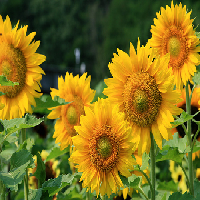

In [33]:
sunflower

In [34]:
array = image.img_to_array(sunflower)
array

array([[[ 33.,  49.,  39.],
        [ 34.,  52.,  40.],
        [ 32.,  52.,  40.],
        ...,
        [ 13.,  32.,  10.],
        [ 15.,  41.,  12.],
        [ 15.,  41.,  12.]],

       [[ 28.,  45.,  35.],
        [ 30.,  50.,  38.],
        [ 28.,  50.,  37.],
        ...,
        [ 21.,  46.,  17.],
        [ 25.,  48.,  19.],
        [ 23.,  48.,  18.]],

       [[ 22.,  44.,  31.],
        [ 27.,  50.,  34.],
        [ 24.,  48.,  34.],
        ...,
        [ 26.,  58.,  19.],
        [ 28.,  55.,  20.],
        [ 25.,  55.,  19.]],

       ...,

       [[ 96., 138.,  72.],
        [ 83., 111.,  37.],
        [ 61., 100.,  35.],
        ...,
        [ 47.,  94.,  50.],
        [ 46.,  96.,  47.],
        [ 45.,  94.,  47.]],

       [[ 98., 142.,  91.],
        [ 88., 114.,  49.],
        [ 64., 101.,  31.],
        ...,
        [ 46.,  98.,  52.],
        [ 45.,  97.,  49.],
        [ 46.,  95.,  48.]],

       [[102., 145.,  56.],
        [ 86., 119.,  50.],
        [ 60., 1

In [35]:
array = np.expand_dims(array,axis=0)
array

array([[[[ 33.,  49.,  39.],
         [ 34.,  52.,  40.],
         [ 32.,  52.,  40.],
         ...,
         [ 13.,  32.,  10.],
         [ 15.,  41.,  12.],
         [ 15.,  41.,  12.]],

        [[ 28.,  45.,  35.],
         [ 30.,  50.,  38.],
         [ 28.,  50.,  37.],
         ...,
         [ 21.,  46.,  17.],
         [ 25.,  48.,  19.],
         [ 23.,  48.,  18.]],

        [[ 22.,  44.,  31.],
         [ 27.,  50.,  34.],
         [ 24.,  48.,  34.],
         ...,
         [ 26.,  58.,  19.],
         [ 28.,  55.,  20.],
         [ 25.,  55.,  19.]],

        ...,

        [[ 96., 138.,  72.],
         [ 83., 111.,  37.],
         [ 61., 100.,  35.],
         ...,
         [ 47.,  94.,  50.],
         [ 46.,  96.,  47.],
         [ 45.,  94.,  47.]],

        [[ 98., 142.,  91.],
         [ 88., 114.,  49.],
         [ 64., 101.,  31.],
         ...,
         [ 46.,  98.,  52.],
         [ 45.,  97.,  49.],
         [ 46.,  95.,  48.]],

        [[102., 145.,  56.],
       

In [22]:
Flower_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [36]:
index=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
index[3]

'sunflower'

In [27]:
dandelion = image.load_img('/content/flowers/dandelion/10043234166_e6dd915111_n.jpg',target_size=(64,64))
x = image.img_to_array(dandelion)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'daisy'